### Reference 

[Computational Physics](https://www.cambridge.org/core/books/computational-physics/BEE73B0139D4A9993193B57CDC62096E#fndtn-information) by Jos Thijssen.

In [1]:
import numpy as np
from scipy.linalg import eigh
import matplotlib.pyplot as plt
%matplotlib inline

# Variational calculation for the Hydrogen atom

## Basis functions

Use Gaussian type orbitals (GTOs). For example, an $s$-orbital centered at $\bf{R}$ 

$$ \chi_{\alpha,\bf{R}}^{(s)} = \rm{e}^{-\alpha (\bf{r}-\bf{R})^2 } $$

In [2]:
def χα(α, r):
    return np.exp(-α*r*r)

In [3]:
αα = (13.00773, 1.962079, 0.444529, 0.1219492)

In [4]:
# r grid
rr = np.linspace(0,8,100)

Text(0, 0.5, '$χ_α$')

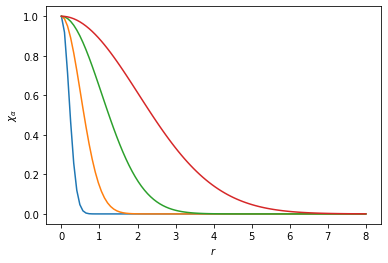

In [5]:
# store wavefunctions in a matrix
χrα = np.array( [ [ χα(α, r) for α in αα] for r in rr ] )

plt.plot(rr, χrα)
plt.xlabel(r"$r$")
plt.ylabel(r"$χ_α$")

## Variational wavefunction

$$
\Psi(\mathbf{r}) = \sum_\alpha C_\alpha \chi_\alpha(\mathbf{r})
$$

with variational parameters $C_\alpha$. 

Writing the Hamiltonian in this basis one obtains the generalized eigenvalue equation
$$
\mathbf{H} \mathbf{C} = E \, \mathbf{S} \mathbf{C}
$$

where the Hamiltonian and matrix elements are given by

$$
H_{pq} = \langle{\chi_p}|H|\chi_q\rangle, \qquad 
S_{pq} = \langle{\chi_p}|\chi_q\rangle
$$

Note that we don't need to normalize the wavefunctions.

## Overlap integrals and matrix elements

![3.29](pngs/3_29.png)

Atomic units: Energy unit is Hartree.

In [6]:
def calc_Spq(αp,αq): # overlap
    return ( np.pi / (αp+αq) )**1.5

def calc_Tpq(αp,αq): # kinetic
    return  3 * np.pi**1.5 * αp * αq / (αp+αq)**2.5

def calc_Apq(αp,αq): # Coulomb
    return -2 * np.pi / (αp+αq)    

In [7]:
# form Hamiltonian and overlap matrices
HM = np.array( [ [calc_Tpq(αp,αq) + calc_Apq(αp,αq) for αp in αα] for αq in αα ] )
SM = np.array( [ [calc_Spq(αp,αq)                   for αp in αα] for αq in αα ] )

In [8]:
EE, UU = eigh(HM, SM)

In [9]:
# print Hydrogen atom ground state energy
print(r"$E_0=$"+f" {EE[0]}")

$E_0=$ -0.499278405667485


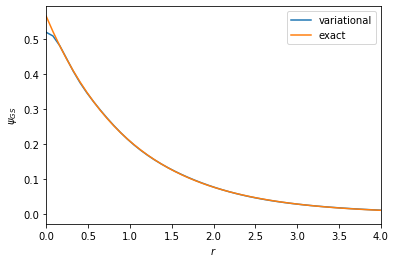

In [14]:
# plot the ground state wavefunction

plt.plot(rr, np.abs( χrα@UU[:,0] )      , label="variational")
plt.plot(rr, np.exp(-rr)/np.sqrt(np.pi) , label="exact")
    
plt.xlim([0,4])
plt.xlabel(r"$r$")
plt.ylabel(r"$\psi_{GS}$")
plt.legend()

# The Helium atom

Interaction matrix elements

![4.17](pngs/4_17.png)

In [58]:
αα = (0.298073, 1.242567, 5.782948, 38.47497)

In [15]:
def calc_Qprqs(αp,αr,αq,αs): # overlap
    return 2*np.pi**2.5/( (αp+αq)*(αr+αs)*np.sqrt(αp+αq+αr+αs) )

In [16]:
HM = np.array( [[   calc_Tpq(αp,αq) + 2 * calc_Apq(αp,αq) for αp in αα] for αq in αα ] )
SM = np.array( [[   calc_Spq(αp,αq)                       for αp in αα] for αq in αα ] )
QT = np.array( [[[[ calc_Qprqs(αp,αr,αq,αs)               for αs in αα] for αq in αα ]
                                                          for αr in αα] for αp in αα ] )

![4.18](pngs/4_18.png)
![4.20](pngs/4_20.png)
![4.21](pngs/4_21.png)

In [19]:
tol = 1e-6
Niter = 100 
EGS = 1e3

CV = np.array( [1/np.sqrt(len(αα))]*len(αα) )

for it in range(Niter):
    
    FM = HM + np.einsum('prqs,r,s',QT,CV,CV)
    
    EE, UU = eigh(FM, SM)
    
    CV = UU[:,0]
    
    E0 = 2*np.einsum('p,pq,q', CV, HM, CV) + np.einsum('prqs,p,q,r,s', QT, CV, CV, CV, CV)
    
    #print(f"{it:2}, {EGS:10.8}, {E0:10.8}")
    if np.abs(EGS-E0)<tol:
        break
        
    EGS = E0

# print Helium atom ground state energy
print(r"$E_0=$"+f" {EGS}")

$E_0=$ -2.8416767597216506


# The H2+ ion

In [28]:
def F0(t):
    from scipy.special import erf
    if t==0:
        return 1.
    sqt = np.sqrt(t)
    return  np.sqrt(np.pi)*erf(sqt)/2/sqt

In [29]:
F0(0), F0(1e-5)

(1.0, 0.9999966666766666)

In [30]:
def calc_Rp(α,β,RA,RB):
    return (α*RA+β*RB)/(α+β)

In [31]:
def calc_SαβRARB(α,β,RA,RB):
    αpβ=α+β
    return (np.pi/αpβ)**1.5*np.exp(-α*β/αpβ*(RA-RB)**2)

In [32]:
def calc_TαβRARB(α,β,RA,RB):
    αβ=α*β
    αpβ=α+β
    αβoαpβ = αβ / αpβ
    RAB2 = (RA-RB)**2
    return αβoαpβ * (3-2*αβoαpβ*RAB2) * (np.pi/αpβ)**1.5 *np.exp(-αβoαpβ*RAB2)

In [33]:
def calc_AαβRARB(α,β,RA,RB,RC,Z=1):
    αpβ=α+β
    RP = calc_Rp(α,β,RA,RB)
    return -2*np.pi*Z/αpβ*np.exp(-α*β/αpβ*(RA-RB)**2)*F0(αpβ*(RC-RP)**2)

In [34]:
αα = (13.00773, 1.962079, 0.444529, 0.1219492)

In [35]:
RR = [0, 1]

In [36]:
ααRR = [ [α,R] for R in RR for α in αα ]

In [37]:
SM = np.array( [ [calc_SαβRARB(α,β,RA,RB) for α,RA in ααRR] for β,RB in ααRR ] )

HM = np.array( [ [calc_TαβRARB(α,β,RA,RB)+
                  calc_AαβRARB(α,β,RA,RB,RR[0],Z=1)+
                  calc_AαβRARB(α,β,RA,RB,RR[1],Z=1) for α,RA in ααRR] for β,RB in ααRR ] )

In [38]:
EE, UU = eigh(HM, SM)

In [39]:
# print H2+ ground state energy
print(r"$E_0=$"+f" {EE[0]}")

$E_0=$ -1.4424552955482246


# The H2 molecule

In [40]:
def calc_QαβRARB(α,β,γ,δ,RA,RB,RC,RD,Z=1):
    αpγ=α+γ
    βpδ=β+δ
    RP = calc_Rp(α,β,RA,RC)
    RQ = calc_Rp(α,β,RB,RD)
    return 2*np.pi**2.5/( αpγ*βpδ*np.sqrt(αpγ+βpδ) ) *\
             np.exp(-α*γ/αpγ*(RA-RC)**2 - β*δ/βpδ*(RB-RD)**2)*\
             F0(αpγ*βpδ/(αpγ+βpδ)*(RP-RQ)**2)

In [41]:
αα = (13.00773, 1.962079, 0.444529, 0.1219492)

In [42]:
RR = [0, 1]

In [45]:
ααRR = [ [α,R] for R in RR for α in αα ]

In [46]:
SM = np.array( [ [calc_SαβRARB(α,β,RA,RB) for α,RA in ααRR] for β,RB in ααRR ] )

HM = np.array( [ [calc_TαβRARB(α,β,RA,RB)+
                  calc_AαβRARB(α,β,RA,RB,RR[0],Z=1)+
                  calc_AαβRARB(α,β,RA,RB,RR[1],Z=1) for α,RA in ααRR] for β,RB in ααRR ] )

QT = np.array( [ [ [ [ calc_QαβRARB(α,β,γ,δ,RA,RB,RC,RD,Z=1)
               for α,RA in ααRR] for β,RB in ααRR ] for γ,RC in ααRR] for δ,RD in ααRR ] )

In [47]:
tol = 1e-6
Niter = 100 
EGS = 1e3

CV = np.array( [1/np.sqrt(len(ααRR))]*len(ααRR) )

for it in range(Niter):
    
    FM = HM + np.einsum('prqs,r,s',QT,CV,CV)
    
    EE, UU = eigh(FM, SM)
    
    CV = UU[:,0]
    
    E0 = 2*np.einsum('p,pq,q', CV, HM, CV) + np.einsum('prqs,p,q,r,s', QT, CV, CV, CV, CV)
    
    #print(f"{it:2}, {EGS:10.8}, {E0:10.8}")
    if np.abs(EGS-E0)<tol:
        break
        
    EGS = E0

# print Helium atom ground state energy
print(r"$E_0=$"+f" {EGS+1}")

$E_0=$ -1.0780816790168988


In [48]:
CV

array([0.09275446, 0.16665171, 0.11588497, 0.02540915, 0.09329479,
       0.16302778, 0.12491446, 0.01671247])